# **MARKENNOVY**

## **READING TABLES**


These are the neccessary table to make the merges

In [15]:
import pandas as pd

In [16]:
joborder = pd.read_csv("jobOrder.csv", delimiter="|", encoding="latin-1")
articulos = pd.read_csv("Articulos.csv", delimiter="|", encoding="latin-1")
orderRow = pd.read_csv("orderRow.csv", delimiter="|", encoding="latin-1")
familias = pd.read_csv("Familias.csv", delimiter="|", encoding="latin-1")
lineasprod = pd.read_csv("LineasProd.csv", delimiter="|", encoding="latin-1")
subfamilias = pd.read_csv("SubFamilias.csv", delimiter="|", encoding="latin-1")

C:\Users\David\AppData\Local\Temp\ipykernel_13860\2964262143.py:1: DtypeWarning: Columns (2,12,13,20,25) have mixed types. Specify dtype option on import or set low_memory=False.
  joborder = pd.read_csv("jobOrder.csv", delimiter="|", encoding="latin-1")


In [17]:
data = []
with open("PedLin.csv", "r", encoding="latin1") as file:
    for line in file:
        # Process each line and split it based on the delimiter
        row = line.strip().split("|")
        data.append(row)

# Create a DataFrame from the processed data
ped_lin = pd.DataFrame(data)
ped_lin.columns = ped_lin.iloc[0]
ped_lin = ped_lin[1:]
ped_lin = ped_lin.iloc[:,0:10]
ped_lin = ped_lin.rename(columns={"Ped_nNum": "Numero_Pedido", "PedLin_nNum": "Linea_Pedido"})

## **MERGES**

***MERGE OF OrderRow with pedlin***

Firstly, it is necessary to split the column **TEC_INST** into 3 columns, and to change the name of the columns in order make the merges

In [18]:
orderRow[['1', '2', '3']] = orderRow["TEC_INST"].str.split(",", expand=True)
orderRow = orderRow.drop(columns="TEC_INST")
orderRow = orderRow.rename(columns={'1': 'Numero_Pedido', '2': 'Linea_Pedido', '3': 'ItemCode'})

In [19]:
orderRow.isnull().sum()

CONF_CODE            0
ORDER_ROW            0
Numero_Pedido    40581
Linea_Pedido     40584
ItemCode         40589
dtype: int64

Dropping **null values** to make the merges

In [20]:
orderRow.dropna(inplace=True)

Changing **objects** into **integers**

In [21]:
orderRow['Numero_Pedido'] = orderRow['Numero_Pedido'].astype('int64')
orderRow['Linea_Pedido'] = orderRow['Linea_Pedido'].astype('int64')

Dropping **null values** and changing objects to **integers** in **ped_lin** to make the merge

In [22]:
ped_lin['Numero_Pedido'] = pd.to_numeric(ped_lin['Numero_Pedido'], errors='coerce')

# Drop rows with missing (NaN) values in the 'Numero_Pedido' column
ped_lin.dropna(subset=['Numero_Pedido'], inplace=True)

# Convert 'Numero_Pedido' column to int64
ped_lin['Numero_Pedido'] = ped_lin['Numero_Pedido'].astype('int64')

In [23]:
ped_lin['Linea_Pedido'] = pd.to_numeric(ped_lin['Linea_Pedido'], errors='coerce')

# Drop rows with missing (NaN) values in the 'Numero_Pedido' column
ped_lin.dropna(subset=['Linea_Pedido'], inplace=True)

# Convert 'Numero_Pedido' column to int64
ped_lin['Linea_Pedido'] = ped_lin['Linea_Pedido'].astype('int64')

In [24]:
orderRow_ped_lin = orderRow.merge(ped_lin, on=['Numero_Pedido', 'Linea_Pedido'], how='left')

In [25]:
orderRow_ped_lin.isnull().mean()

CONF_CODE        0.000000
ORDER_ROW        0.000000
Numero_Pedido    0.000000
Linea_Pedido     0.000000
ItemCode         0.000000
Prod_sId         0.000094
Diametro         0.000094
Radio            0.000094
Adicion          0.000094
Esfera           0.000094
Cilindro         0.000094
Eje              0.000094
Comments         0.000094
dtype: float64

***Merge of Articulos with Fmilias, lineas_prod and subfamilias and pedlin***

In [26]:
# Perform left join with familias
articulos_merged = articulos.merge(familias, left_on='CodFam', right_on='Code', how='left')

In [27]:
# Perform left join with lineasprod
articulos_merged = articulos_merged.merge(lineasprod, left_on='LinProd', right_on='Code', how='left')

In [28]:
# Perform left join with subfamilias
articulos_merged = articulos_merged.merge(subfamilias, left_on='CodSubFam', right_on='Code', how='left')

Dropping unwanted columns and renaming them by the name of the columns of pre-joined tables

In [29]:
# Drop unwanted columns
articulos_merged = articulos_merged.drop(['LinProd', 'CodFam', 'CodSubFam', 'Code_x', 'Code_y', 'Code'], axis=1)

# Rename columns
articulos_merged = articulos_merged.rename(columns={'Name_x': 'NameFam', 'Name_y': 'Name_LinProd', 'Name': 'Name_SubFam'})

In [30]:
articulos_merged

,ItemCode,ItemName,Desing,FrozenFor,NameFam,Name_LinProd,Name_SubFam
0,001,Varios de compras,NoDesing,N,NaN,NaN,NaN
1,002,SEVEN 12pk T/MF x20,NoDesing,N,TALONARIOS,CHBK MOULD,TALONARIOS
2,003,Voucher Mylo&Edof 3pk x300,NoDesing,N,TALONARIOS,CHBK LATH,TALONARIOS
3,004,Checkbook 50 EyeGo Bio Fresh 6pk A T & MF,NoDesing,N,TALONARIOS,CHBK MOULD,TALONARIOS
4,005,Checkbook 10 EyeGo Bio Fresh 6pk A T & MF,NoDesing,N,TALONARIOS,CHBK MOULD,TALONARIOS
...,...,...,...,...,...,...,...
5563,zw,Chequier saphir Rx MF 50,NoDesing,N,TALONARIOS,CHBK LATH,TALONARIOS
5564,ZX,VOUCHER WIDE & PERFECTA ASPH 3PK,NoDesing,N,TALONARIOS,CHBK MOULD,TALONARIOS
5565,ZY,VOUCHER WIDE & PERFECTA ASPH 1PK,NoDesing,N,TALONARIOS,CHBK MOULD,TALONARIOS
5566,zz,Chequier Rx sphérique 170,NoDesing,N,TALONARIOS,CHBK LATH,TALONARIOS


***Merge of Articulos with OrderRow and pedlin***

Dropping the **null value** of **"ItemCode"** in **Articulos table** to make the merges

In [31]:
# Check null values
articulos_merged.isnull().sum()

ItemCode          1
ItemName         13
Desing            0
FrozenFor         0
NameFam         390
Name_LinProd    282
Name_SubFam     415
dtype: int64

In [32]:
# Which item are the null values of ItemCode
null_itemcode = articulos_merged.loc[articulos_merged['ItemCode'].isnull()]
print(null_itemcode)

     ItemCode            ItemName    Desing FrozenFor     NameFam  \
4219      NaN  TALONARIO 12 COMBO  NoDesing         N  TALONARIOS   

     Name_LinProd Name_SubFam  
4219    CHBK LATH  TALONARIOS  


We remove the null value, that are **TALONARIO 12 COMBO**. It is not a type of contact lense.

In [33]:
# Dropping null values
articulos_merged.dropna(subset=['ItemCode'], inplace=True)

In [34]:
merged_orderRow = orderRow_ped_lin.merge(articulos_merged, on="ItemCode", how='left')

***Merge of OrdeRow, pedlin and articulos table with JobOrder and pedlin***

In **joborder** we make a **left join**, since we are only interested in those rows that appear in **joborder**, since we need their scheduled date to make predictions

In [35]:
merged_table = joborder.merge(merged_orderRow, on=["CONF_CODE", "ORDER_ROW"], how='left')

## **CLEANING MERGED TABLE**


In [36]:
cleaning_table = merged_table

## **Combining columns from JobOrder and Pedlin**


Here, we will merge the columns that are repeated in **PedLin** and **Job Order**

***Combination of **BASE_RADIUS** and **Radio*****

**Standarizing** values to do the merge of columns

In [37]:
# Convert 'BASE_RADIUS' column to string type
cleaning_table['BASE_RADIUS'] = cleaning_table['BASE_RADIUS'].astype(str)

# Replace comma with dot in 'BASE_RADIUS' column
cleaning_table['BASE_RADIUS'] = cleaning_table['BASE_RADIUS'].str.replace(',', '.')

# Convert 'BASE_RADIUS' column to numeric data type
cleaning_table['BASE_RADIUS'] = pd.to_numeric(cleaning_table['BASE_RADIUS'], errors='coerce')

# Round 'BASE_RADIUS' column to one decimal place
cleaning_table['BASE_RADIUS'] = cleaning_table['BASE_RADIUS'].round(1)

# Convert 'BASE_RADIUS' column to string type
cleaning_table['BASE_RADIUS'] = cleaning_table['BASE_RADIUS'].astype(str)

# Remove the dot and following zero for numbers without decimals
cleaning_table['BASE_RADIUS'] = cleaning_table['BASE_RADIUS'].str.replace('\.0$', '')

# Check the unique values in the modified 'BASE_RADIUS' column
print(cleaning_table['BASE_RADIUS'].unique())

C:\Users\David\AppData\Local\Temp\ipykernel_13860\2616542636.py:17: FutureWarning: The default value of regex will change from True to False in a future version.
  cleaning_table['BASE_RADIUS'] = cleaning_table['BASE_RADIUS'].str.replace('\.0$', '')


['8.9' '9.2' '8' '8.6' '8.7' '8.3' '7.4' '7.7' '8.4' '9.8' '8.2' '9.5'
 '8.8' '9' '7.6' '9.6' '7.1' '9.4' '7.8' '6.3' '6.8' '10.1' '7.3' '8.5'
 '7.9' '7.5' '9.1' '9.3' '6.6' '6.5' '6.2' '5.9' '6' '7' '8.1' '5' '10'
 '16.3' '7.2' '4' '2.2' '40' 'nan']


In [38]:
# Combine the "BASE_RADIUS" and "Radio" columns into a new column
cleaning_table["Combined_Radius"] = cleaning_table["BASE_RADIUS"].combine_first(cleaning_table["Radio"])

# Drop the original "BASE_RADIUS" and "Radio" columns if needed
cleaning_table.drop(["BASE_RADIUS", "Radio"], axis=1, inplace=True)

In [39]:
cleaning_table["Combined_Radius"] = cleaning_table["Combined_Radius"].astype(float)

***Combination of **DIAMETER** and **Diametro*****

**Standarizing** values to do the merge of columns

In [40]:
# Convert 'DIAMETER' column to string type
cleaning_table['DIAMETER'] = cleaning_table['DIAMETER'].astype(str)

# Replace comma with dot in 'DIAMETER' column
cleaning_table['DIAMETER'] = cleaning_table['DIAMETER'].str.replace(',', '.')

# Convert 'DIAMETER' column to numeric data type
cleaning_table['DIAMETER'] = pd.to_numeric(cleaning_table['DIAMETER'], errors='coerce')

# Round 'DIAMETER' column to one decimal place
cleaning_table['DIAMETER'] = cleaning_table['DIAMETER'].round(1)

# Convert numbers without decimals to string with '.0'
cleaning_table['DIAMETER'] = cleaning_table['DIAMETER'].apply(lambda x: f"{x:.1f}" if x % 1 != 0 else f"{int(x)}.0")

# Check the unique values in the modified 'DIAMETER' column
print(cleaning_table['DIAMETER'].unique())

['14.5' '14.4' '13.0' '14.0' '15.0' '13.5' '15.5' '16.0' '12.5' '14.2'
 '13.8' '14.3' '17.0' '12.0' '13.1' '11.5' '11.0' '16.5' '10.0' '14.8'
 '9.8' '9.6' '9.4' '7.0' '12.2' '9.2' '9.0' '8.8' '17.5' '18.0' '9.5'
 '14.7' '6.0' '4.0' '29.5' '29.8' 'nan' '8.0' '11.4']


In [41]:
# Convert 'Diametro' column to string type
cleaning_table['Diametro'] = cleaning_table['Diametro'].astype(str)

# Replace decimal comma with dot in 'Diametro' column
cleaning_table['Diametro'] = cleaning_table['Diametro'].str.replace(',', '.')

# Iterate over the 'Diametro' column and update the values
for i, value in enumerate(cleaning_table['Diametro']):
    if value.isnumeric():
        cleaning_table.at[i, 'Diametro'] = f"{value}.0"

# Check the unique values in the modified 'Diametro' column
print(cleaning_table['Diametro'].unique())

['14.500000' '14.400000' '13.000000' '14.000000' '15.000000' 'nan'
 '13.500000' '15.500000' '16.000000' '' '12.500000' '9.600000' '12.000000'
 '18.000000' '17.500000' '17.000000' '11.500000' '.000000' '16.500000'
 '14.300000']


In [42]:
# Combine the "DIAMETER" and "Diametro" columns into a new column
cleaning_table["Combined_Diameter"] = cleaning_table["DIAMETER"].combine_first(merged_table["Diametro"])

# Drop the original "DIAMETER" and "Diametro" columns if needed
cleaning_table.drop(["DIAMETER", "Diametro"], axis=1, inplace=True)

In [43]:
cleaning_table["Combined_Diameter"] = cleaning_table["Combined_Diameter"].astype(float)

***Combination of **POWER** and **Esfera*****

In [44]:
# Combine the "POWER" and "Esfera" columns into a new column
cleaning_table["Combined_Power"] = cleaning_table["POWER"].combine_first(cleaning_table["Esfera"])

# Drop the original "POWER" and "Esfera" columns if needed
cleaning_table.drop(["POWER", "Esfera"], axis=1, inplace=True)

**Standarizing** values

In [45]:
cleaning_table['Combined_Power'] = cleaning_table['Combined_Power'].str.replace(',', '.')
cleaning_table['Combined_Power'] = cleaning_table['Combined_Power'].str.replace(r'(?<!\d)\.(?!\d)', '0')
cleaning_table['Combined_Power'] = cleaning_table['Combined_Power'].str.replace(r'-(?=\.)', '-0')
cleaning_table["Combined_Power"] = cleaning_table["Combined_Power"].astype(float)

C:\Users\David\AppData\Local\Temp\ipykernel_13860\3773099314.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  cleaning_table['Combined_Power'] = cleaning_table['Combined_Power'].str.replace(r'(?<!\d)\.(?!\d)', '0')
C:\Users\David\AppData\Local\Temp\ipykernel_13860\3773099314.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  cleaning_table['Combined_Power'] = cleaning_table['Combined_Power'].str.replace(r'-(?=\.)', '-0')


***Combination of **CYLINDER** and **Cilindro*****

**Standarizing** values to do the merge of columns

In [46]:
cleaning_table["CYLINDER"] = cleaning_table["CYLINDER"].str.replace(",", ".").str.replace(r"(?<!\d)\.", "0.").astype(float).round(2)

C:\Users\David\AppData\Local\Temp\ipykernel_13860\3891686047.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  cleaning_table["CYLINDER"] = cleaning_table["CYLINDER"].str.replace(",", ".").str.replace(r"(?<!\d)\.", "0.").astype(float).round(2)


In [47]:
cleaning_table["Cilindro"] = cleaning_table["Cilindro"].str.replace(",", ".").str.replace(r"(?<!\d)\.", "0.")
cleaning_table["Cilindro"] = cleaning_table["Cilindro"].replace('', '0').astype(float).round(2)

C:\Users\David\AppData\Local\Temp\ipykernel_13860\3464817192.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  cleaning_table["Cilindro"] = cleaning_table["Cilindro"].str.replace(",", ".").str.replace(r"(?<!\d)\.", "0.")


In [48]:
# Combine the "CYLINDER" and "Cilindro" columns into a new column
cleaning_table["Combined_Cylinder"] = cleaning_table["CYLINDER"].combine_first(cleaning_table["Cilindro"])

# Drop the original "CYLINDER" and "Cilindro" columns
cleaning_table.drop(["CYLINDER", "Cilindro"], axis=1, inplace=True)

***Combination of **POWER_AXIS** and **Eje*****

**Standarizing** values to make the merges

In [49]:
cleaning_table["Eje"] = cleaning_table["Eje"].replace('', '0')
cleaning_table["POWER_AXIS"] = cleaning_table["POWER_AXIS"].replace('', '0')
cleaning_table["POWER_AXIS"] = cleaning_table["POWER_AXIS"].str.split(",", expand=True)[0]
cleaning_table["POWER_AXIS"] = cleaning_table["POWER_AXIS"].str.split(",", expand=True)[0]
cleaning_table["POWER_AXIS"] = cleaning_table["POWER_AXIS"].replace('', '0')
cleaning_table["Eje"] = cleaning_table["Eje"].astype(float)
cleaning_table["POWER_AXIS"] = cleaning_table["POWER_AXIS"].astype(float)

In [50]:
# Combine the "CYLINDER" and "Cilindro" columns into a new column
cleaning_table["Combined_Axis"] = cleaning_table["POWER_AXIS"].combine_first(cleaning_table["Eje"])

# Drop the original "CYLINDER" and "Cilindro" columns if needed
cleaning_table.drop(["POWER_AXIS", "Eje"], axis=1, inplace=True)

In [51]:
final_table = cleaning_table

**EXPORTING FINAL TABLE TO CSV**

We export the final table as csv, so we don't have to run the whole notebook every time, and we just have to import that table.

In [52]:
import pandas as pd
final_table.to_csv('../Capstone/final_table.csv',index=False)

**IMPORTING FINAL TABLE AS CSV**

In [1]:
import pandas as pd
final_table = pd.read_csv("final_table.csv")

C:\Users\David\AppData\Local\Temp\ipykernel_4188\1918386789.py:2: DtypeWarning: Columns (2,11,12,15,20,32) have mixed types. Specify dtype option on import or set low_memory=False.
  final_table = pd.read_csv("final_table.csv")


## **DROPPING IRRELEVANT VARIABLES FOR THE MODEL**


Firstly, we **drop irrelevant columns** for the model

In [2]:
model_table = final_table.drop(columns=["CONF_CODE","ORDER_ROW", "JO_PROG", "STATE", "CUST_CODE", "PRESCRIPTION", "PRIORITY_COMP", "PRODUCT_CODE",
                          "MATERIAL_CODE", "BATCH_NUMBER", "LATHE_SETUP", "STEEP_RADIUS", "BACK_AXIS", "JUNCTION_THK", 
                          "EDGE_THK", "MEAS_BASE_RADIUS", "MEAS_STEEP_RADIUS", "TRAY_CODE", "STERIL_CODE", 
                          "STERIL_BATCH", "LABEL_PRINTED", "LAUNCH_DATE", "REJECTS_QTY", "DELIVERY_DATE", "Numero_Pedido",
                          "Linea_Pedido", "ItemCode", "Prod_sId", "Comments", "Desing", "FrozenFor",  "NameFam", "ItemName"])

**CHECK VALUES SCHEDULED_QTY > 1**

In [3]:
filtered_rows = model_table.loc[model_table['SCHEDULED_QTY'] > 1]
unique_values = filtered_rows['Name_SubFam'].unique()

print(unique_values)

[nan]


In [4]:
filtered_rows_1 = model_table.loc[model_table['SCHEDULED_QTY'] > 1]
unique_values_1 = filtered_rows_1['Name_LinProd'].unique()

print(unique_values_1)

[nan]


We drop all the null values from SCHEDULED_QTY equal or bigger than 2, since they are all null values for **"Name_SubFam"** and **"Name_LinProd"**

In [5]:
model_table = model_table.drop(model_table[model_table['SCHEDULED_QTY'] >= 2].index)

**Standarize CENTER_THK and Adicion**

Convert **CENTER_THK** into a float

In [6]:
model_table["CENTER_THK"] = model_table["CENTER_THK"].str.replace(",", "").astype(float)
model_table["Adicion"] = model_table["Adicion"].str.replace(",", "").astype(float)

**Changing the SCHEDULED_DATA to datetime**

We change the **SCHEDULED_DATA** into datatime format

In [7]:
model_table['SCHEDULED_DATE'] = pd.to_datetime(model_table['SCHEDULED_DATE'])

**Dropping null values of SCHEDULED_DATE to datetime**

In [8]:
model_table.isnull().sum()

CENTER_THK            60161
SCHEDULED_DATE        60162
SCHEDULED_QTY             2
Adicion              127375
Name_LinProd         122601
Name_SubFam          122601
Combined_Radius           2
Combined_Diameter         2
Combined_Power            1
Combined_Cylinder     67485
Combined_Axis         67484
dtype: int64

In [9]:
model_table.dropna(subset=['SCHEDULED_DATE'], inplace=True)

A total of **60162 null values** are dropped. We drop them because we need the DATE each contact lense has been produced to make the predictions.

**Impute null values of Combined_Cylinder and Combined_Axis**

Replace null values from those columns since we consider 0 means that a contact lense is not using that feature. We dont want to drop them because we would drop the entire row, eliminating deleting relevant information

In [10]:
model_table.isnull().sum()

CENTER_THK                0
SCHEDULED_DATE            0
SCHEDULED_QTY             0
Adicion              125603
Name_LinProd         121119
Name_SubFam          121119
Combined_Radius           0
Combined_Diameter         0
Combined_Power            0
Combined_Cylinder     66232
Combined_Axis         66232
dtype: int64

In [11]:
model_table['Combined_Cylinder'].fillna(0, inplace=True)
model_table['Combined_Axis'].fillna(0, inplace=True)
model_table['Adicion'].fillna(0, inplace=True)

**PIVOT TABLE**

This pivot table groups by Name_linProd and Name_subFam, summing up the total amount produced of each type

Firstly, we check what are the type of contact lenses more repeated

In [12]:
# Assuming 'final_table' is your DataFrame containing the data
pivot_table = pd.pivot_table(model_table, 
                             values='SCHEDULED_QTY', 
                             index=['Name_LinProd',"Name_SubFam", 'Combined_Power', "Combined_Radius", "CENTER_THK", "Combined_Diameter", "Combined_Cylinder", "Combined_Axis", "Adicion"], 
                             aggfunc='count')
pivot_table = pivot_table.sort_values(by='SCHEDULED_QTY', ascending=False)

In [13]:
pivot_table

SCHEDULED_QTY
Name_LinProd Name_SubFam      Combined_Power Combined_Radius CENTER_THK Combined_Diameter Combined_Cylinder Combined_Axis Adicion                 
SAPHIR RX    SPHERIC           0.00          8.9             1600.0     16.0               0.00             0.0           0.0                 5620
                              -15.00         8.6             1200.0     14.5               0.00             0.0           0.0                 5609
                              -16.00         8.6             1200.0     14.5               0.00             0.0           0.0                 5580
                              -14.00         8.6             1200.0     14.5               0.00             0.0           0.0                 5568
                              -13.00         8.6             1200.0     14.5               0.00             0.0           0.0                 5539
...                                                                                                                                            ...
GENTLE 59    TORIC            -2.50          7.7             1969.0     14.0              -0.75             70.0          0.0                    1
SAPHIR RX    MULTIFOCAL TORIC -3.75          8.3             2155.0     14.5              -1.75             90.0          1000000.0              1
GENTLE 59    TORIC            -2.50          7.7             1970.0     14.5              -0.75             70.0          0.0                    1
                                                             1972.0     14.5              -2.75             105.0         0.0                    1
SAPHIR 3M    MULTIFOCAL TORIC -5.00          8.0             1739.0     14.0              -2.75             160.0         2500000.0              1

[2808773 rows x 1 columns]

**Saphir Rx SPHERIC** are the lenses that appear the most. Then, checking the parameters, we know that the variables that this contact lense uses are **Combined_Power**, **CENTER_THK**, **Combined_Radius**, and **Combined_Diameter**.

By this pivot_table, we have also what is the number of times that a contact lense has been produced with its **agrupation of parameters**.

This is the agrupation of parameters that has been produced the most for **Saphir Rx SPHERIC**:
* **Combined_Power:** 0.00
* **Combined_Radius:** 8.9
* **CENTER_THK:** 1600
* **Combined_Diameter:** 16.0



In [14]:
model_table_saphir = model_table.loc[(model_table["Name_LinProd"] == "SAPHIR RX") & (model_table["Name_SubFam"]=="SPHERIC")]

In [15]:
model_table_saphir

,CENTER_THK,SCHEDULED_DATE,SCHEDULED_QTY,Adicion,Name_LinProd,Name_SubFam,Combined_Radius,Combined_Diameter,Combined_Power,Combined_Cylinder,Combined_Axis
0,1300.0,2012-03-05 08:37:00,1.0,0.0,SAPHIR RX,SPHERIC,8.9,14.5,-1.5,0.0,0.0
1,1300.0,2012-03-05 08:37:00,1.0,0.0,SAPHIR RX,SPHERIC,8.9,14.5,-1.5,0.0,0.0
2,1300.0,2012-03-05 08:37:00,1.0,0.0,SAPHIR RX,SPHERIC,8.9,14.5,-1.5,0.0,0.0
3,1300.0,2012-03-05 08:37:00,1.0,0.0,SAPHIR RX,SPHERIC,9.2,14.5,-1.5,0.0,0.0
4,1300.0,2012-03-05 08:37:00,1.0,0.0,SAPHIR RX,SPHERIC,9.2,14.5,-1.5,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
12222844,1200.0,2023-05-20 09:34:00,1.0,0.0,SAPHIR RX,SPHERIC,8.0,14.5,-12.5,0.0,0.0
12222845,1200.0,2023-05-20 09:34:00,1.0,0.0,SAPHIR RX,SPHERIC,8.0,14.5,-13.0,0.0,0.0
12222846,1200.0,2023-05-20 09:34:00,1.0,0.0,SAPHIR RX,SPHERIC,8.0,14.5,-13.0,0.0,0.0
12222847,1200.0,2023-05-20 09:34:00,1.0,0.0,SAPHIR RX,SPHERIC,8.0,14.5,-13.0,0.0,0.0


In [16]:
model_table_saphir.isnull().sum()

CENTER_THK           0
SCHEDULED_DATE       0
SCHEDULED_QTY        0
Adicion              0
Name_LinProd         0
Name_SubFam          0
Combined_Radius      0
Combined_Diameter    0
Combined_Power       0
Combined_Cylinder    0
Combined_Axis        0
dtype: int64

We change the column **SCHEDULED_DATE** to be the index.

In [17]:
# Set "SCHEDULED_DATE" as the index
model_table_saphir.set_index("SCHEDULED_DATE", inplace=True)

In [18]:
model_table_saphir

,CENTER_THK,SCHEDULED_QTY,Adicion,Name_LinProd,Name_SubFam,Combined_Radius,Combined_Diameter,Combined_Power,Combined_Cylinder,Combined_Axis
SCHEDULED_DATE,,,,,,,,,,
2012-03-05 08:37:00,1300.0,1.0,0.0,SAPHIR RX,SPHERIC,8.9,14.5,-1.5,0.0,0.0
2012-03-05 08:37:00,1300.0,1.0,0.0,SAPHIR RX,SPHERIC,8.9,14.5,-1.5,0.0,0.0
2012-03-05 08:37:00,1300.0,1.0,0.0,SAPHIR RX,SPHERIC,8.9,14.5,-1.5,0.0,0.0
2012-03-05 08:37:00,1300.0,1.0,0.0,SAPHIR RX,SPHERIC,9.2,14.5,-1.5,0.0,0.0
2012-03-05 08:37:00,1300.0,1.0,0.0,SAPHIR RX,SPHERIC,9.2,14.5,-1.5,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2023-05-20 09:34:00,1200.0,1.0,0.0,SAPHIR RX,SPHERIC,8.0,14.5,-12.5,0.0,0.0
2023-05-20 09:34:00,1200.0,1.0,0.0,SAPHIR RX,SPHERIC,8.0,14.5,-13.0,0.0,0.0
2023-05-20 09:34:00,1200.0,1.0,0.0,SAPHIR RX,SPHERIC,8.0,14.5,-13.0,0.0,0.0


These are the values for the parameters, within **Saphir Rx Toric Blister**, of the type of contact lense that has been produced the most, so we filter by them

In [19]:
model_table_saphir = model_table_saphir[
    (model_table_saphir['Combined_Axis'] == 0) &
    (model_table_saphir['CENTER_THK'] == 1600) &
    (model_table_saphir['Combined_Radius'] == 8.9) &
    (model_table_saphir['Combined_Diameter'] == 16) &
    (model_table_saphir['Combined_Power'] == 0) &
    (model_table_saphir['Combined_Cylinder'] == 0) &
    (model_table_saphir['Adicion'] == 0)
]

In [20]:
model_table_saphir

,CENTER_THK,SCHEDULED_QTY,Adicion,Name_LinProd,Name_SubFam,Combined_Radius,Combined_Diameter,Combined_Power,Combined_Cylinder,Combined_Axis
SCHEDULED_DATE,,,,,,,,,,
2013-08-27 18:50:00,1600.0,1.0,0.0,SAPHIR RX,SPHERIC,8.9,16.0,0.0,0.0,0.0
2013-08-29 13:36:00,1600.0,1.0,0.0,SAPHIR RX,SPHERIC,8.9,16.0,0.0,0.0,0.0
2013-09-13 17:48:00,1600.0,1.0,0.0,SAPHIR RX,SPHERIC,8.9,16.0,0.0,0.0,0.0
2013-10-30 12:52:00,1600.0,1.0,0.0,SAPHIR RX,SPHERIC,8.9,16.0,0.0,0.0,0.0
2013-10-30 12:52:00,1600.0,1.0,0.0,SAPHIR RX,SPHERIC,8.9,16.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2023-05-15 22:58:00,1600.0,1.0,0.0,SAPHIR RX,SPHERIC,8.9,16.0,0.0,0.0,0.0
2023-05-15 22:58:00,1600.0,1.0,0.0,SAPHIR RX,SPHERIC,8.9,16.0,0.0,0.0,0.0
2023-05-15 22:58:00,1600.0,1.0,0.0,SAPHIR RX,SPHERIC,8.9,16.0,0.0,0.0,0.0


In [21]:
# Select only the "SCHEDULED_QTY" column
model_table_saphir = model_table_saphir[["SCHEDULED_QTY"]]

In [22]:
# Group the data per day and per month
model_table_saphir_monthly = model_table_saphir.resample('M').sum()

In [23]:
model_table_saphir_monthly

,SCHEDULED_QTY
SCHEDULED_DATE,
2013-08-31,2.0
2013-09-30,1.0
2013-10-31,3.0
2013-11-30,0.0
2013-12-31,0.0
...,...
2023-01-31,192.0
2023-02-28,76.0
2023-03-31,162.0


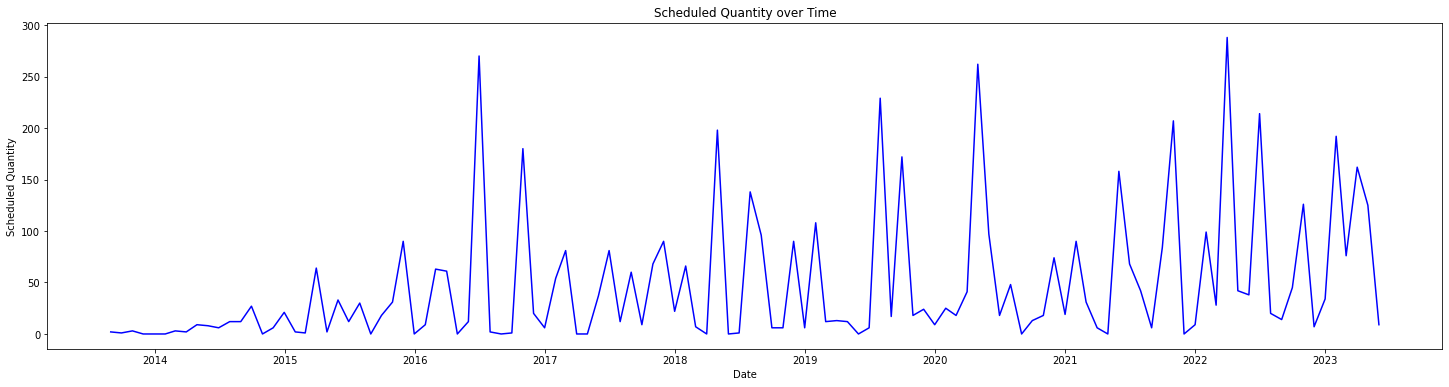

In [24]:
import matplotlib.pyplot as plt

# Plotting the data
plt.figure(figsize=(25, 6))
plt.plot(model_table_saphir_monthly.index, model_table_saphir_monthly['SCHEDULED_QTY'], color='blue')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Scheduled Quantity')
plt.title('Scheduled Quantity over Time')

# Show the plot
plt.show()

This represents the complete demand for **Saphir Rx SPHERIC** The demand is grouped based on the most requested features for this particular contact lens.

## **Model: SARIMA**


In [25]:
# Create a copy of the DataFrame for training and prediction
df = model_table_saphir_monthly.copy()

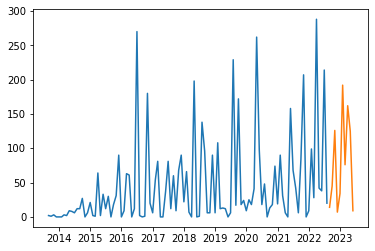

In [26]:
train = df[:108]
test = df[-10:]
plt.plot(train)
plt.plot(test)

In [27]:
from pmdarima.arima import auto_arima

In [37]:
stepwise_model = auto_arima(df, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=0, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=1.03 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1245.059, Time=0.03 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=1224.171, Time=0.42 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=0.53 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1244.320, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=1246.111, Time=0.10 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=1223.580, Time=0.86 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=1.19 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.57 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=1224.652, Time=0.55 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=1220.668, Time=0.98 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=1220.146, Time=0.66 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=1245.607, Time=0.13 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=0.81 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=i

In [38]:
stepwise_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  118
Model:             SARIMAX(2, 0, 0)x(1, 1, 0, 12)   Log Likelihood                -605.073
Date:                            Mon, 10 Jul 2023   AIC                           1220.146
Time:                                    11:01:10   BIC                           1233.463
Sample:                                08-31-2013   HQIC                          1225.544
                                     - 05-31-2023                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     19.9584      8.425      2.369      0.018       3.447      36.470
ar.L1         -0.2258      0.126     -1.798      0.072      -0.472       0.020
ar.L2         -0.2398      0.096     -2.485      0.013      -0.429      -0.051
ar.S.L12      -0.4847      0.074     -6.528      0.000      -0.630      -0.339
sigma2      5152.5312    589.166      8.745      0.000    3997.787    6307.275
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                30.50
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):               2.23   Skew:                             0.86
Prob(H) (two-sided):                  0.02   Kurtosis:                         4.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [39]:
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(df)

(0.01, False)

In [40]:
stepwise_model.fit(train)

ARIMA(order=(2, 0, 0), scoring_args={}, seasonal_order=(1, 1, 0, 12),
      suppress_warnings=True)

In [41]:
future_forecast = stepwise_model.predict(n_periods=37)

<AxesSubplot:xlabel='SCHEDULED_DATE'>

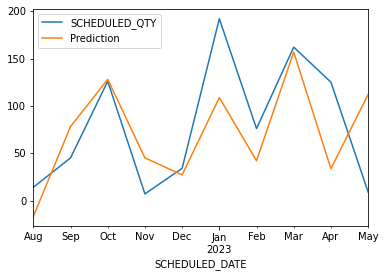

In [42]:
future_forecast = pd.DataFrame(future_forecast,index = test.index,columns=["Prediction"])
pd.concat([test,future_forecast],axis=1).plot()

In [43]:
from sklearn.metrics import mean_squared_error

# Assuming "test" and "future_forecast" are the arrays containing the actual values and predicted values, respectively

# Calculate MSE
mse = mean_squared_error(test, future_forecast)

# Print the MSE
print("Mean Squared Error:", mse)

Mean Squared Error: 3063.0368460071654


In [44]:
import numpy as np

def calculate_mape(actual, predicted):
    """
    Calculates the Mean Absolute Percentage Error (MAPE) between the actual values and predicted values.
    :param actual: array-like, actual values
    :param predicted: array-like, predicted values
    :return: float, MAPE value
    """
    actual = np.array(actual)
    predicted = np.array(predicted)
    
    errors = np.abs((actual - predicted) / actual)
    mape = np.mean(errors) * 100
    
    return mape

# Example us

mape = calculate_mape(test,future_forecast)
print("MAPE:", mape)

MAPE: 216.83083124155365


In [45]:
future_forecast

,Prediction
SCHEDULED_DATE,
2022-08-31,-16.763652
2022-09-30,78.129196
2022-10-31,128.015189
2022-11-30,45.028787
2022-12-31,27.109879
2023-01-31,108.727019
2023-02-28,42.054833
2023-03-31,156.849792
2023-04-30,33.639593
